<a href="https://colab.research.google.com/github/smruthyunjaya/deep-learning-keras-tf-tutorial/blob/master/cmpe257_SAAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Data Visualization

In [ ]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split, KFold, cross_val_score   
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report as cls_report
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #Support Vector Machine 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
bc= pd.read_csv("data.csv") ## dataset from kaggle with nominal diagnosis values
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
## encoding of the diagnosis
bc['diagnosis']=bc['diagnosis'].map({'M':1,'B':0})
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# check for null values in dataset
bc.isnull().values.any()

True

In [ ]:
# Count class labels
bc['diagnosis'].value_counts()


0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
## drop the unwanted columns
bc.drop(['id','Unnamed: 32'], axis = 1, inplace = True) ## dropped the id and unnamed column
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Data visualization to create histogram
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
## description of the data
bc.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
## groupig the data by the diagnosis
bc.groupby('diagnosis').mean()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
# Separate labels and features
X = bc.iloc[:, 1:31]
Y = bc.iloc[:,0]
X.shape


(569, 30)

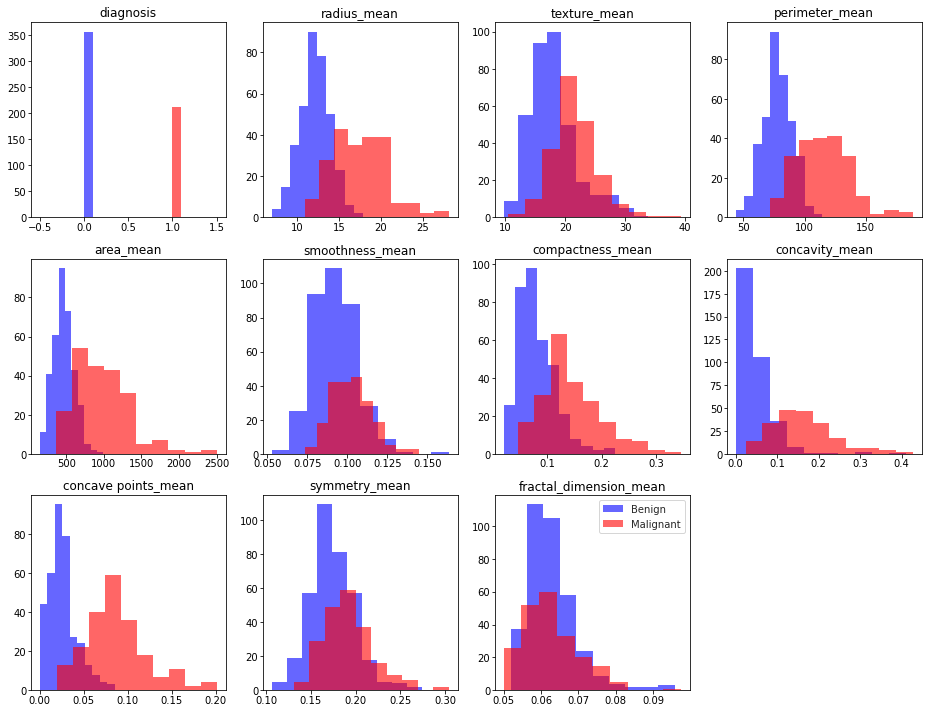

In [ ]:
# Visualize tumor characteristics for positive and negatives diagnoses 

bc_n = bc[bc['diagnosis'] == 0]
bc_y = bc[bc['diagnosis'] == 1]

# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bc.columns[0:11])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bc_n[b], label = 'Benign', stacked = True, alpha=0.6, color= 'b')
    ax.hist(bc_y[b], label= 'Malignant', stacked = True, alpha=0.6, color= 'r')
    
    ax.set_title(b)
fig.set_size_inches(13, 10)
sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


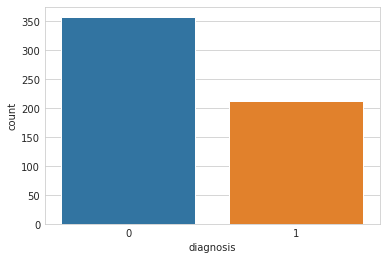

In [ ]:
## count of benign and malignant data
sns.countplot(bc['diagnosis'],label="Count")

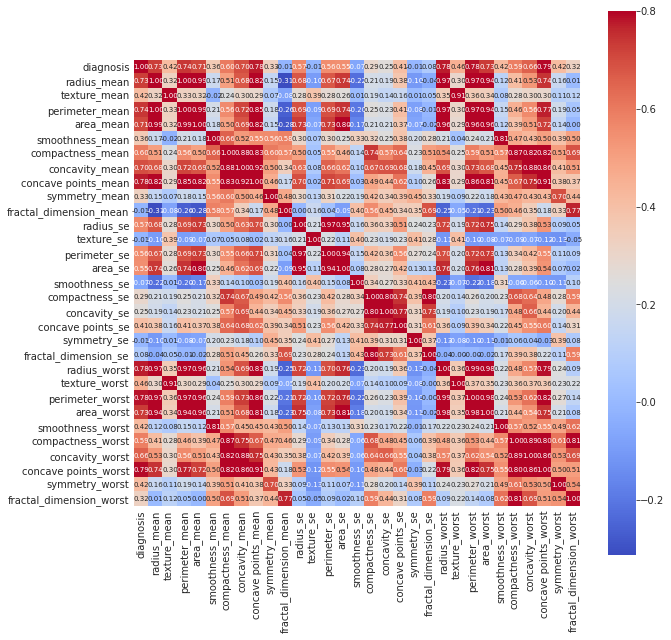

In [ ]:
# Print correlation matrix
matrix = bc.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, vmax=.8, square=True,annot=True, fmt= '.2f', cbar=True, annot_kws={'size': 7}, cmap="coolwarm");

In [ ]:
## dropping the features with less correlation
less_corr = bc.corr().diagnosis[bc.corr().diagnosis<=0.2].index
print (less_corr)

Index(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


In [ ]:
bc.shape

(569, 31)

In [ ]:
bc = bc.drop(less_corr,axis=1)

In [ ]:
bc.shape

(569, 26)

In [ ]:
bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Preprocessing

In [ ]:
# Separate labels and features
X = bc.iloc[:, 1:31]
Y = bc.iloc[:,0]
X.shape

(569, 25)

In [ ]:
#Split the available data into 80%  training set and 20% testing set. 
#Train the algorithm on the first part, make predictions on the second part and
#evaluate the predictions against the expected results.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = .8, random_state = 0)



In [ ]:
#Feature Scaling using standscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Model Testing:
We are including 4 types of models:
Parametric models: SVM
Non-Parametric models: KNN
Linear models: Logistic Regression
Non-Linear models: Random Forest Classifier

### Logistic Regression

In [ ]:
## logistic regression implementation

# Define parameters for optimization of Logistic Regression
LR_para = {'C':[0.001, 0.1, 1, 10, 100],'max_iter':[1000000]}
LR_opt=[]
LR_opt.append((LogisticRegression(), LR_para))

#Function to check the accuracy of the model using dictionaries
def check(parameter_dictionary, scoring = 'accuracy'):    
    for model, para in LR_opt:    
        kfold = KFold(len(X_train_norm), random_state=0, shuffle=True)
        model_grid = GridSearchCV(model, para)
        model_grid.fit(X_train_norm,Y_train)
        cv_result = cross_val_score(model_grid, X_train_norm, Y_train, cv = kfold, scoring=scoring)
        print ("Cross Validation Accuracy For LR :- Accuracy: %f SD: %f" % (cv_result.mean(), cv_result.std()))
        print ("Best parameters for Logistic regression :", model_grid.best_params_)       
    return(cv_result)
        


In [ ]:
from sklearn.model_selection import GridSearchCV
result= check (LR_opt,scoring='accuracy')

Cross Validation Accuracy For LR :- Accuracy: 0.982418 SD: 0.131428
Best parameters for Logistic regression : {'C': 1, 'max_iter': 1000000}


In [ ]:
LR = LogisticRegression(C=1, max_iter=1000000)
LR.fit(X_train_norm, Y_train)
y_pred_LR = LR.predict(X_test_norm)
#Model Evaluation
LRacc = accuracy_score(Y_test, y_pred_LR)


In [ ]:
print('Classification Report: \n' + str(cls_report(Y_test, y_pred_LR)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



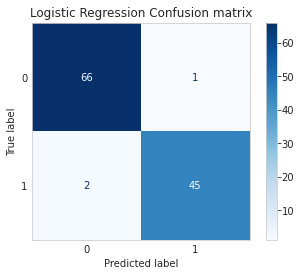

In [ ]:
from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(LR, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression Confusion matrix")
plt.grid(None) 
plt.show()

### KNN Classification

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

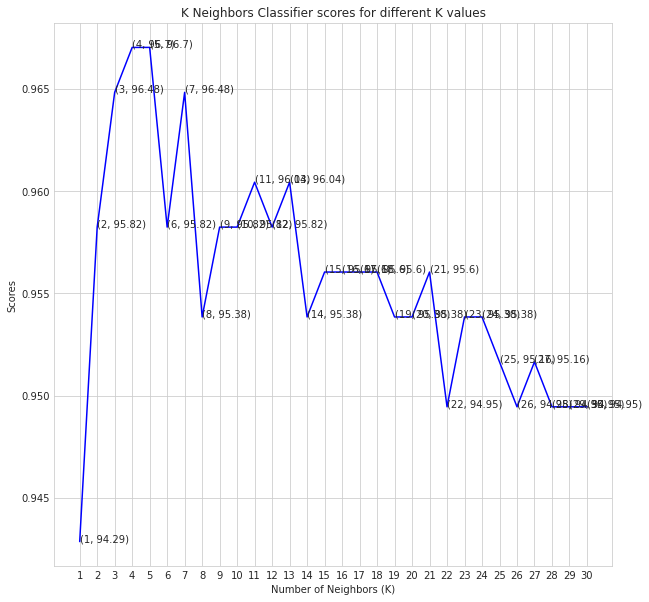

In [ ]:
# use the same model as before with cross validation

%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)
    scores = cross_val_score(knn, X_train_norm, Y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10,10))
plt.plot([k for k in k_range], k_scores, color = 'blue')
for i in range(1,31):
    plt.text(i, k_scores[i-1], (i, round(k_scores[i-1]*100,2)))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In [ ]:
print('Accuracy score on Train data: {}'.format(k_scores[4]*100))

Accuracy score on Train data: 96.70329670329669


In [ ]:
# Test model with K = 4
knn = KNeighborsClassifier(n_neighbors = 4,metric = 'minkowski', p = 2)
scores = cross_val_score(knn, X_test_norm, Y_test, cv=5, scoring='accuracy')
print(scores.mean()*100)

   

92.96442687747034


In [ ]:
# Grid search cv optimization
# Define parameters for optimization of KNN
KNN_params = {'n_neighbors':[1,5,10,20,30,50], 'p':[2], 'metric':['minkowski']}
KNN_opt=[]
KNN_opt.append((KNeighborsClassifier(), KNN_params))

#Function to check the accuracy of the model using dictionaries
def check(parameter_dictionary, scoring = 'accuracy'):    
    for model, para in KNN_opt:    
        kfold = KFold(len(X_train_norm), random_state=42, shuffle=True)
        model_grid = GridSearchCV(model, para)
        model_grid.fit(X_train_norm,Y_train)
        cv_result = cross_val_score(model_grid, X_train_norm, Y_train, cv = kfold, scoring=scoring)
        print("Best parameters for KNN", model_grid.best_params_)
        ans = "Cross Validation Accuracy For KNN :- Accuracy: %f SD: %f" % (cv_result.mean(), cv_result.std())
        print(ans)
    return(cv_result)
 


In [ ]:
from sklearn.model_selection import GridSearchCV
result= check(KNN_opt,scoring='accuracy')


Best parameters for KNN {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}
Cross Validation Accuracy For KNN :- Accuracy: 0.969231 SD: 0.172692


In [ ]:
knn = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 5, p=2)
# train the model
knn.fit(X_test_norm, Y_test)
# get the predict value from X_test
y_pred_knn1 = knn.predict(X_test_norm)
# print the score
print('accuracy: ', knn.score(X_test_norm, Y_test))

accuracy:  0.9649122807017544


In [ ]:
print('Classification Report: \n' + str(cls_report(Y_test, y_pred_knn1)))
# The confusion matrix  result which is telling us correct predictions and incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_knn1)
print(confusion_matrix)

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[67  0]
 [ 4 43]]


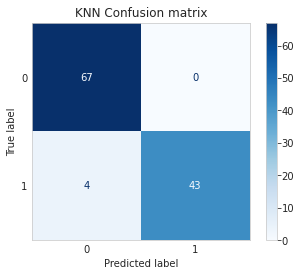

In [ ]:
from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(knn, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("KNN Confusion matrix")
plt.grid(None) 
plt.show()


### Random Forest Classification

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

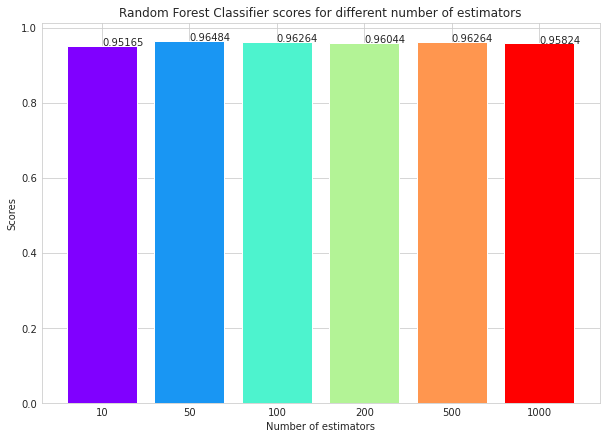

In [ ]:
## K-fold cross validation to get the best estimators
from matplotlib.cm import rainbow
rf_scores = []
estimators = [10, 50, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 42)
    rf_scores.append(cross_val_score(rf_classifier, X_train_norm, Y_train, cv=5, scoring='accuracy').mean())

plt.figure(figsize=(10,7))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],5))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')



In [ ]:
print('Accuracy score on Train data: {}'.format(rf_scores[1]*100))

Accuracy score on Train data: 96.4835164835165


In [ ]:
 from matplotlib.cm import rainbow
rf_scores = []
RF_params = {'n_estimators':[10, 50 ,100, 200, 500]}
RF_opt=[]
RF_opt.append((RandomForestClassifier(), RF_params))
def check(parameter_dictionary, scoring = 'accuracy'):    
     for model, para in RF_opt:  
         kfold = KFold(len(X_train_norm), random_state=0, shuffle=True)  
         model_grid = GridSearchCV(model, para)
         model_grid.fit(X_train_norm,Y_train)
         cv_result = cross_val_score(model_grid, X_train_norm, Y_train, cv = kfold, scoring=scoring)
         print("Best parameters for Random Forest Classifier:", model_grid.best_params_)
         ans = "Cross Validation Accuracy For Randon Forest Classifier :- Accuracy: %f SD: %f" % (cv_result.mean(), cv_result.std())
         print(ans)
     return(cv_result)




In [ ]:
 rf_result = check(RF_opt, scoring='accuracy')

Accuracy score on Test data: 94.73684210526315
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



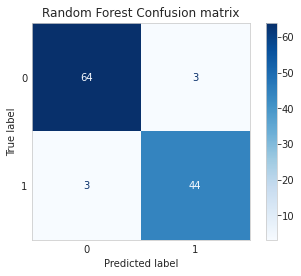

In [ ]:
from sklearn import metrics
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_classifier.fit(X_train_norm, Y_train)
y_pred = rf_classifier.predict(X_test_norm)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(Y_test,y_pred)*100))

print('Classification Report: \n' + str(cls_report(Y_test, y_pred)))

from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(rf_classifier, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Random Forest Confusion matrix")
plt.grid(None) 
plt.show()

### Decision Tree Classification

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

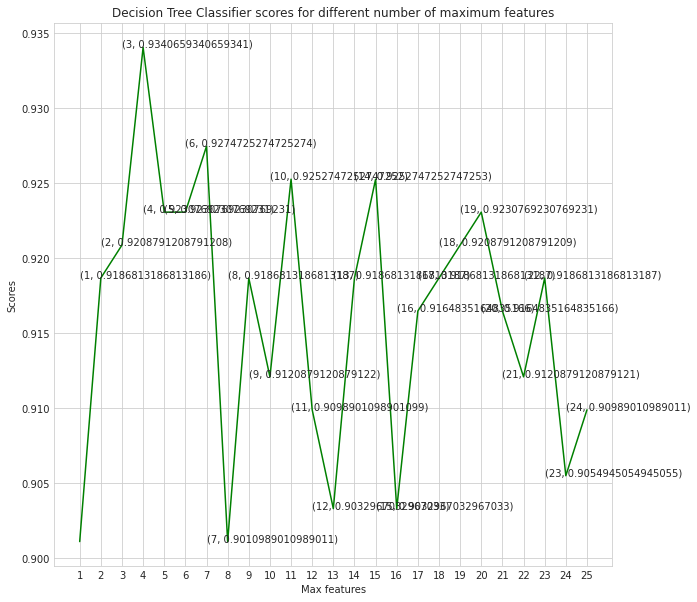

In [ ]:
## Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_scores.append(cross_val_score(dt_classifier, X_train, Y_train, cv=5, scoring='accuracy').mean())


plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
#for i in range(1, len(X.columns)+1):
for i in range(1, len(X.columns)):
   # plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
   plt.text(i, dt_scores[i], (i, dt_scores[i]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')



In [ ]:
print('Accuracy score on Train data: {}'.format(dt_scores[3]*100))

Accuracy score on Train data: 92.3076923076923


In [ ]:
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[3, 5, 10, 20, 50, 100]}
DTC_opt=[]
DTC_opt.append((DecisionTreeClassifier(), DTC_params))

#Function to check the accuracy of the model using dictionaries
def check(parameter_dictionary, scoring = 'accuracy'):    
    for model, para in DTC_opt:    
        kfold = KFold(len(X_train_norm), random_state=42, shuffle=True)
        model_grid = GridSearchCV(model, para)
        model_grid.fit(X_train_norm,Y_train)
        cv_result = cross_val_score(model_grid, X_train_norm, Y_train, cv = kfold, scoring=scoring)
        print("Best parameters for DTC", model_grid.best_params_)
        ans = "Cross Validation Accuracy For DTC :- Accuracy: %f SD: %f" % (cv_result.mean(), cv_result.std())
        print(ans)
    return(cv_result)
result= check(DTC_opt,scoring='accuracy') 

Best parameters for DTC {'criterion': 'entropy', 'max_depth': 5}
Cross Validation Accuracy For DTC :- Accuracy: 0.940659 SD: 0.236261


In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth =5, random_state = 42, criterion='entropy')
dt_classifier.fit(X_train_norm, Y_train)
y_pred = dt_classifier.predict(X_test_norm)
print('Accuracy  score on Test data: {}'.format(metrics.accuracy_score(Y_test,y_pred)*100))

Accuracy  score on Test data: 94.73684210526315


In [ ]:
print('Classification Report: \n' + str(cls_report(Y_test, y_pred)))
# The confusion matrix  result which is telling us correct predictions and incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]


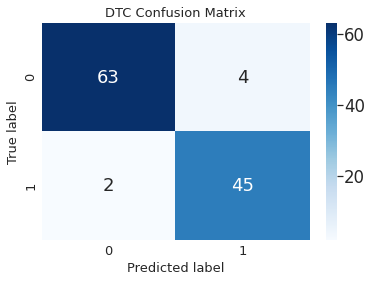

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.5) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'13'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);

title_font = {'size':'13'}  # Adjust to fit
ax.set_title('DTC Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=13)  # Adjust to fit
ax.xaxis.set_ticklabels([0, 1]);
ax.yaxis.set_ticklabels([0, 1]);
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


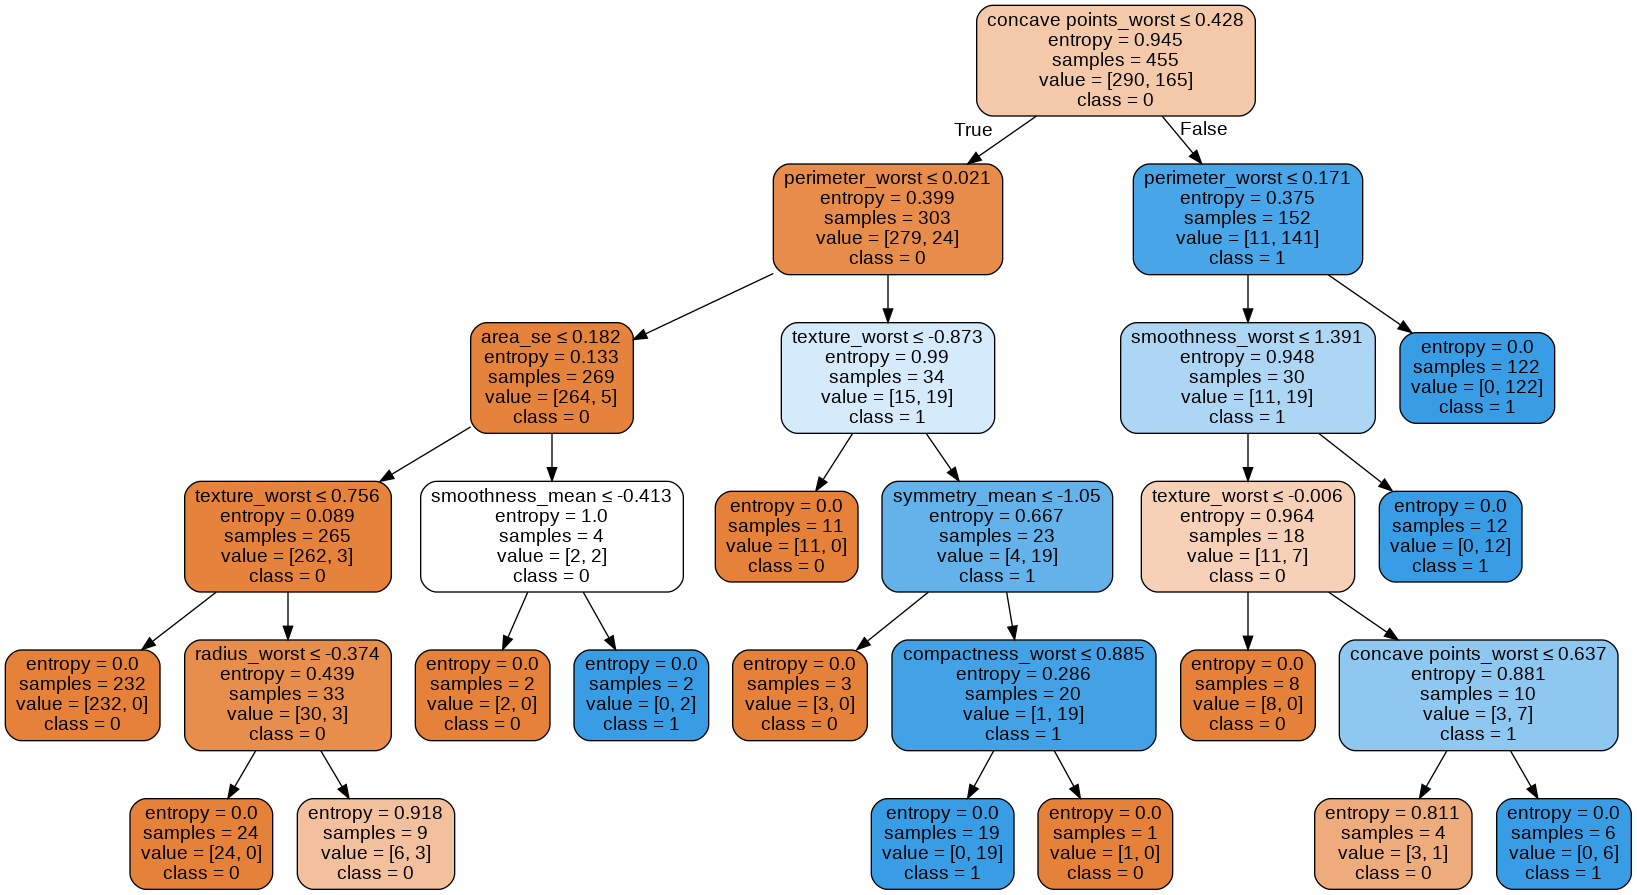

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

my_list=X.columns.values.tolist()

dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = my_list,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### Support Vector Machine

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

SVMresults = []

strfold = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
model_grid_SVM = GridSearchCV(SVC(), SVM_params)
model_grid_SVM.fit(X_train_norm,Y_train)
cv_results = cross_val_score(model_grid_SVM, X_train_norm, Y_train, cv = strfold, scoring='accuracy')
SVMresults.append(cv_results)

means = model_grid_SVM.cv_results_['mean_test_score']
stds = model_grid_SVM.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model_grid_SVM.cv_results_['params']):
    print("%0.3f for %r" % (1-mean, params))
print()
print ("Cross Validation Accuracy:", cv_results.mean())
print()
print("Best Kernel and regularization parameter:")
print(model_grid_SVM.best_params_)

0.363 for {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
0.081 for {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}
0.055 for {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
0.363 for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.081 for {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}
0.246 for {'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}
0.363 for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.081 for {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
0.363 for {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
0.363 for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.081 for {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.363 for {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}
0.363 for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.081 for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
0.363 for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'poly'}
0.363 for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.022 for {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.055 for {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
0.06

accuracy on train dataset: 0.985
accuracy on test dataset: 0.965
Accuracy score on Train data: 97.58241758241759


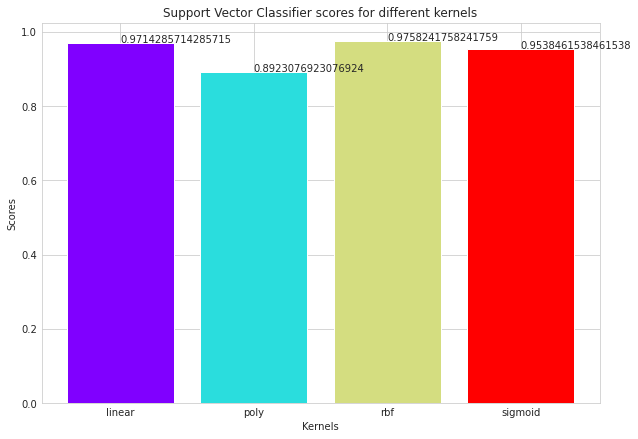

In [ ]:
svm= SVC()
svm.fit(X_train_norm, Y_train)

print('accuracy on train dataset: {:.3f}'.format(svm.score(X_train_norm,Y_train)))
print('accuracy on test dataset: {:.3f}'.format(svm.score(X_test_norm,Y_test)))


svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_scores.append(cross_val_score(svc_classifier, X_train_norm, Y_train, cv=5, scoring='accuracy').mean())


from matplotlib.cm import rainbow
import numpy as np
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

In [ ]:
print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

Accuracy score on Train data: 97.58241758241759


In [ ]:
from sklearn import metrics
svc_classifier = SVC(kernel = 'rbf', C= 10, gamma = 0.01)
svm.fit(X_train_norm, Y_train)
y_pred_svm = svm.predict(X_test_norm)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(Y_test,y_pred_svm)*100))

Accuracy score on Test data: 96.49122807017544


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



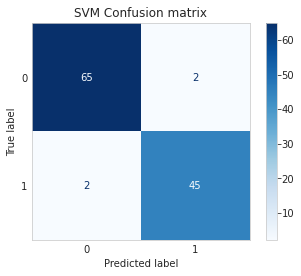

In [ ]:
print('Classification Report: \n' + str(cls_report(Y_test, y_pred_svm)))
from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(svm, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("SVM Confusion matrix")
plt.grid(None) 
plt.show()